## Purpose: Noise

Demonstration: 
    1. Parameter fit
    2. Influence of noise on the Evidence

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import PolynomialModel
from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

noise = numpy.random.randn( N )


We construct data with an increasing amounts of noise and calculate the evidence for polynomial models of increasing degree. 


    scale    degree   evidence
    0.010         0   -29.677
    0.010         1   -25.402
    0.010         2   -21.564
    0.010         3     7.999
    0.010         4     3.081
    0.010         5    -1.991
    0.010         6    -7.215


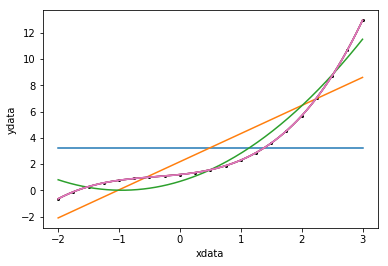

    scale    degree   evidence
    0.100         0   -29.655
    0.100         1   -25.437
    0.100         2   -21.838
    0.100         3    -9.001
    0.100         4   -12.919
    0.100         5   -16.991
    0.100         6   -21.215


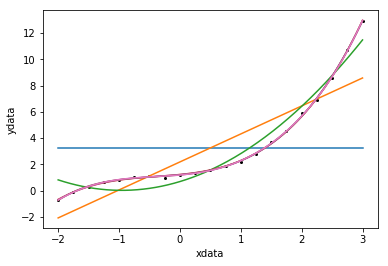

    scale    degree   evidence
    1.000         0   -29.683
    1.000         1   -26.659
    1.000         2   -26.070
    1.000         3   -26.001
    1.000         4   -28.919
    1.000         5   -31.991
    1.000         6   -35.215


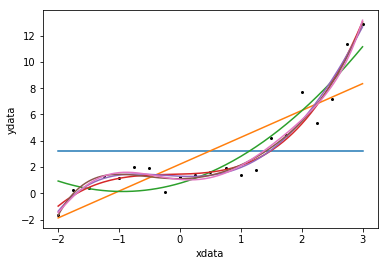

    scale    degree   evidence
   10.000         0   -37.952
   10.000         1   -39.580
   10.000         2   -41.427
   10.000         3   -43.001
   10.000         4   -44.919
   10.000         5   -46.991
   10.000         6   -49.215


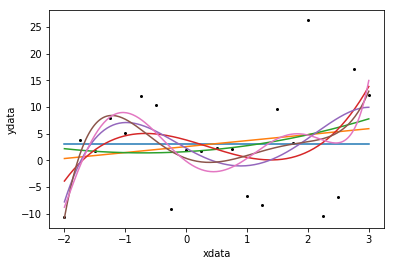

In [4]:
# plotFit( x, y, truth=ym, show=False )
yy = numpy.zeros( (4,7), dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
sig = 0.01
for k in range( 4 ):
    y = ym + sig * noise
    plotFit( x, y, show=False )
    print( "    scale    degree   evidence")
    for deg in range( 7 ) :
        poly = PolynomialModel( deg )
        np = poly.getNumberOfParameters()
        fitter = Fitter( x, poly )
        param = fitter.fit( y )
        plt.plot( xi, poly( xi ) )
        chisq = fitter.chisq
        stdev = fitter.stdevs
        logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
        print( fmt( sig ), fmt( deg ), fmt( logpr ) )
        yy[k,deg] = logpr
    sig *= 10
    plt.show()

Plot the evidences found: data with noise of 0.01 in green, noise of 0.1 in red, 1 in blue and 10 in magenta. 

Note that the model selection depends on the amount of noise present in the data.
    

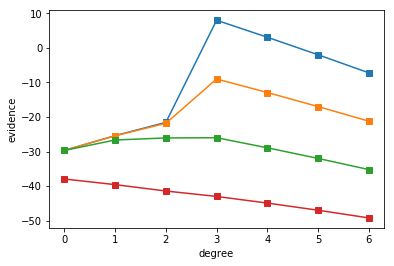

In [5]:
for k in range( 4 ) :
    plt.plot( yy[k,:], '-s' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.xlim( -0.3, 6.3 )
plt.show()